In [1]:
import pickle

pickle_file = '-data.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    X = save['X']
    y = save['y']
    typesList = save['typesList']
    del save  # hint to help gc free up memory
    print('Data set', X.shape, y.shape)

('Data set', (12450, 32, 32), (12450, 1))


image dimensions: (32, 32)
target category: cube


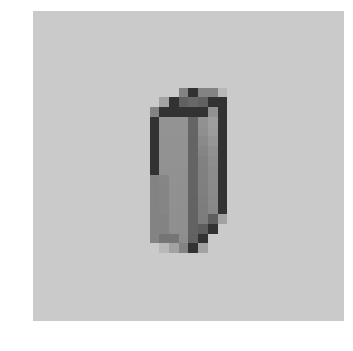

In [2]:
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_index = 0

img = X[img_index]
print "image dimensions:", img.shape
print "target category:", (typesList[y[img_index][0]])

imshow(img, cmap = plt.get_cmap('gray'), vmin = -1, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [3]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import backend as K

Using TensorFlow backend.


In [4]:
# number of classes
num_classes = 3

# image dimensions
img_rows, img_cols = X.shape[1],  X.shape[2]

if K.image_dim_ordering() == 'th':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

y = np_utils.to_categorical(y, num_classes)

In [8]:
# model hyperparameters
batch_size = 32
nb_epoch = 15

# network architecture
patch_size_1 = 3
patch_size_2 = 3

depth_1 = 32
depth_2 = 32

pool_size = 2

num_hidden_1 = 128
num_hidden_2 = 128

dropout = 0.5

In [9]:
model = Sequential()

model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_2, patch_size_2, patch_size_2, border_mode='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Flatten())

model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_classes))

model.add(Activation('softmax'))

In [10]:
checkpoint_name = "-model.hdf5"
checkpointer = ModelCheckpoint(checkpoint_name, verbose=0, save_best_only=True)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

history = model.fit(X, y, validation_split=0.3, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, callbacks=[checkpointer])

Train on 8715 samples, validate on 3735 samples
Epoch 1/30
8715/8715 [==============================] - 30s - loss: 0.6007 - acc: 0.7399 - val_loss: 0.2275 - val_acc: 0.9100
Epoch 2/30
8715/8715 [==============================] - 37s - loss: 0.2044 - acc: 0.9221 - val_loss: 0.1096 - val_acc: 0.9596
Epoch 3/30
8715/8715 [==============================] - 39s - loss: 0.1273 - acc: 0.9549 - val_loss: 0.0801 - val_acc: 0.9738
Epoch 4/30
8715/8715 [==============================] - 41s - loss: 0.0898 - acc: 0.9688 - val_loss: 0.0716 - val_acc: 0.9770
Epoch 5/30
8715/8715 [==============================] - 42s - loss: 0.0762 - acc: 0.9751 - val_loss: 0.0497 - val_acc: 0.9834
Epoch 6/30
8715/8715 [==============================] - 43s - loss: 0.0593 - acc: 0.9795 - val_loss: 0.0440 - val_acc: 0.9863
Epoch 7/30
8715/8715 [==============================] - 43s - loss: 0.0517 - acc: 0.9812 - val_loss: 0.0361 - val_acc: 0.9880
Epoch 8/30
8715/8715 [==============================] - 42s - loss: 0.

['acc', 'loss', 'val_acc', 'val_loss']


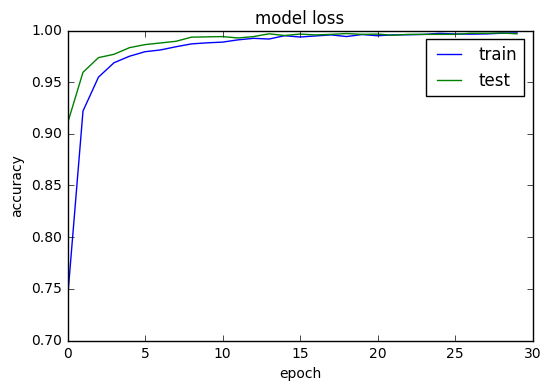

In [12]:
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()